In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Paramètres
N = 4337  # nombre de joueurs
K = 10   # nombre d'options
values = [9, 10, 13.3, 12.3, 17,15.5,12.5,10,18.25,11.125]  # valeurs de chaque option

# Probabilité estimée que les autres joueurs choisissent chaque option
# On peut ajuster cela selon une stratégie apprise ou aléatoire
estimated_probabilities = [] # doit faire 1
for i in range(len(values)):
    prob = values[i]/np.sum(values)  # probabilité aléatoire pour chaque option
    estimated_probabilities.append(prob)

# Fonction pour estimer le gain espéré pour chaque option
def expected_utilities(values, estimated_probabilities, N_other_players):
    expected_util = []
    for i, v in enumerate(values):
        # espérance du nombre de joueurs sur l'option i
        expected_count = N_other_players * estimated_probabilities[i]
        # le joueur lui-même choisit aussi l'option
        total_count = expected_count + 1
        utility = v / total_count
        expected_util.append(utility)
    return expected_util

# Simuler les choix des autres joueurs selon les probabilités
def simulate_choices(probabilities, N_other_players):
    return np.random.choice(K, N_other_players, p=probabilities)

# Exemple : choisir l'option optimale
N_other = N - 1  # car on se place dans la peau d'un joueur
expected_util = expected_utilities(values, estimated_probabilities, N_other)

print("Utilités espérées par option :", expected_util)
best_choice = np.argmax(expected_util)
print("Meilleur choix estimé :", best_choice, f"(valeur: {values[best_choice]})")


Utilités espérées par option : [0.02964717240516206, 0.029656941788119857, 0.029678780887326544, 0.029673397488205355, 0.029693202182121785, 0.029688183943516917, 0.02967454291195444, 0.029656941788119857, 0.02969675492889155, 0.029665838622324425]
Meilleur choix estimé : 8 (valeur: 18.25)


<BarContainer object of 10 artists>

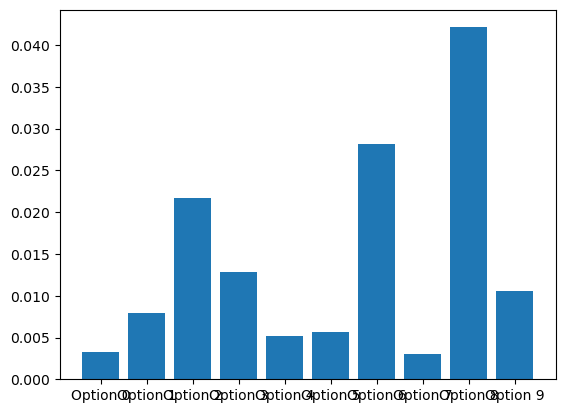

In [8]:
plt.bar(range(K), expected_util, tick_label=[f"Option {i}" for i in range(K)])

<BarContainer object of 10 artists>

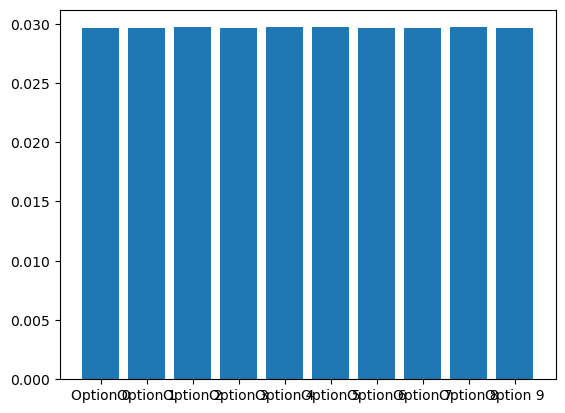

In [11]:
plt.bar(range(K), expected_util, tick_label=[f"Option {i}" for i in range(K)])

# Pour une equiprobabilité

In [36]:
m = [10 for i in range(10)]
inhabitants = [1,6,3,1,10,2,4,2,4,8]
values = [10, 80, 37, 17, 90,31,50,20,73,89]

In [37]:
r = []
for k in range(len(m)):
    r.append((values[k] * 10000) / (inhabitants[k]+ m[k]))

In [38]:
r

[9090.90909090909,
 50000.0,
 28461.53846153846,
 15454.545454545454,
 45000.0,
 25833.333333333332,
 35714.28571428572,
 16666.666666666668,
 52142.857142857145,
 49444.444444444445]

<BarContainer object of 10 artists>

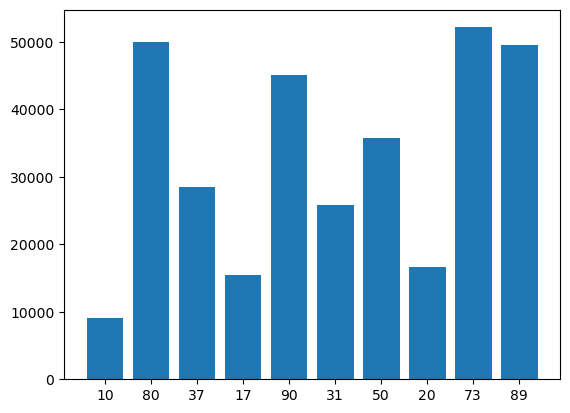

In [39]:
plt.bar(range(K), r, tick_label=values)

In [31]:
returns = r[8]+r[3]-50000
returns

282594.23503325944

# cas ou la probabilité est pondéré par le ratio

<BarContainer object of 10 artists>

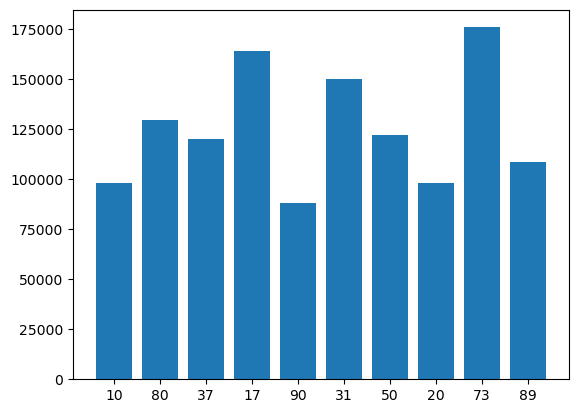

In [35]:
inhabitants = [1,6,3,1,10,2,4,2,4,8]
values = [10, 80, 37, 17, 90,31,50,20,73,89]
m = []
for k in range (len(values)):
    m.append( values[k]/np.sum(values))
   


r = []
for k in range(len(values)):
    r.append((values[k] * 10000) / (inhabitants[k]+ m[k]))
    
plt.bar(range(K), r, tick_label=values)